Step-by-Step Guide to Box-Cox Transformation in Python
Install Necessary Libraries: Make sure you have scipy and matplotlib installed.

Generate a Sample Dataset: You can either create a synthetic dataset or use your own.

Apply the Box-Cox Transformation: Use the scipy.stats.boxcox function.

Visualize the Results: Compare the original and transformed data.

**The Box-Cox transformation** is a statistical technique that helps normalize data, making it more suitable for statistical modeling. It’s particularly useful for data that doesn’t meet the assumption of normality, which many statistical methods require. The Box-Cox transformation is defined by a parameter,
𝜆
λ, which adjusts the transformation to best approximate a normal distribution for a given dataset.

The transformation formula for a given data point 𝑥
x is:

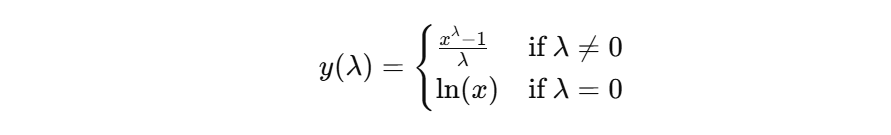

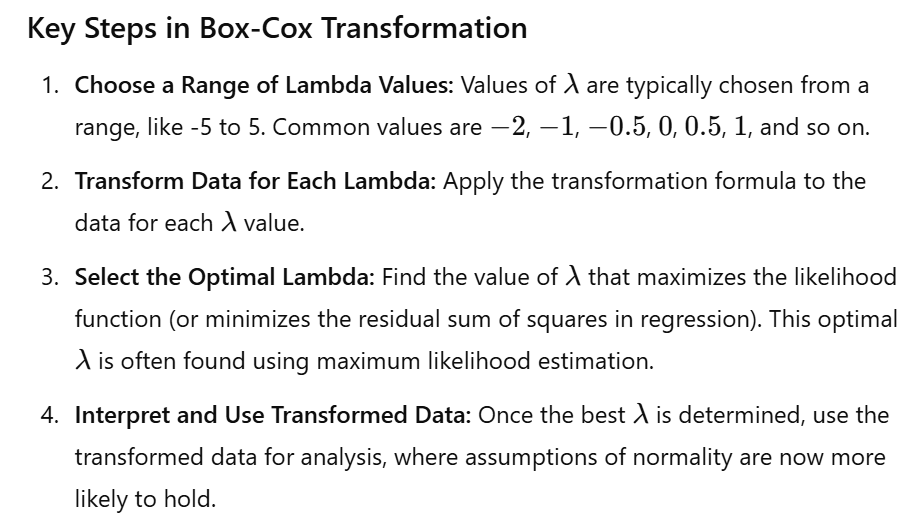

**When to Use Box-Cox**

The Box-Cox transformation is most effective for data that:

* Is positively skewed
* Has non-constant variance
* Contains strictly positive values (the technique does not work for zero or negative values)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
## Step 1: Generate a sample dataset (e.g., Power Law distribution)
alpha = 2.5  # Power law exponent
size = 1000  # Sample size
power_law_data = (np.random.pareto(alpha, size) + 1)  # +1 to avoid zero values

## Step 2: Apply Box-Cox Transformation
## Note: Box-Cox transformation requires input data to be positive
boxcox_transformed_data, lambda_value = stats.boxcox(power_law_data)

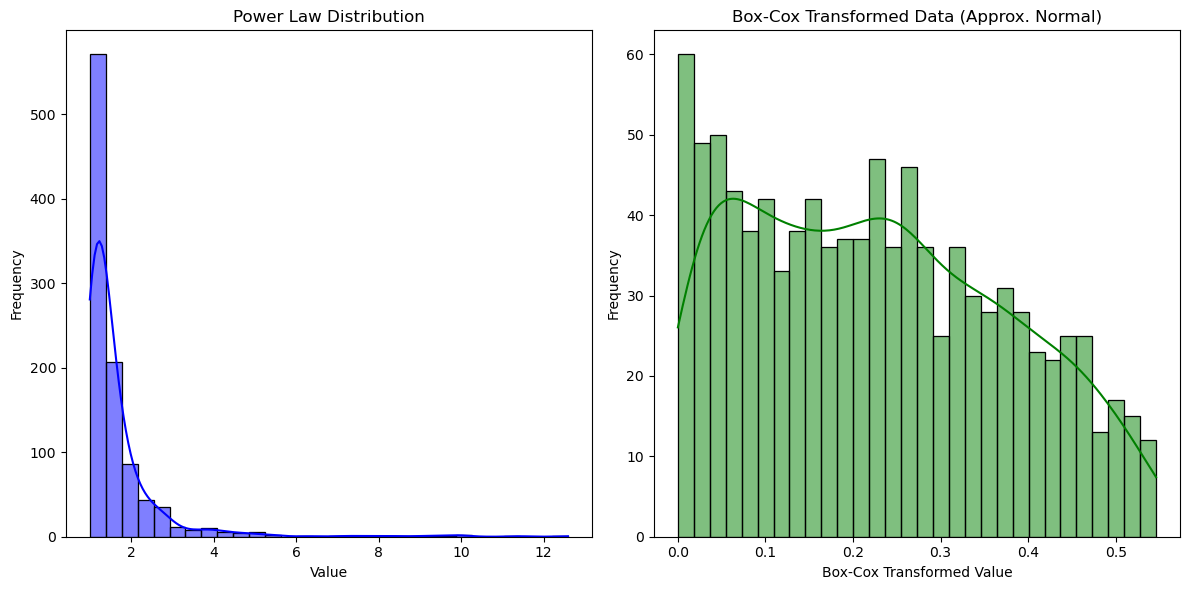

In [5]:
## Step 3: Plot the distributions
plt.figure(figsize=(12, 6))

## Plot original Power Law Distribution
plt.subplot(1, 2, 1)
sns.histplot(power_law_data, bins=30, kde=True, color='blue')
plt.title('Power Law Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

## Plot Box-Cox Transformed Data
plt.subplot(1, 2, 2)
sns.histplot(boxcox_transformed_data, bins=30, kde=True, color='green')
plt.title('Box-Cox Transformed Data (Approx. Normal)')
plt.xlabel('Box-Cox Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
# Print the optimal lambda value
print(f"Optimal Lambda for Box-Cox Transformation: {lambda_value}")

Optimal Lambda for Box-Cox Transformation: -1.8129028013060926


**Box-Cox Transformation:**

The stats.boxcox() function is used to perform the Box-Cox transformation. This function returns two values: the transformed data and the optimal lambda value that maximizes the log-likelihood function.

**Visualization:** The original and Box-Cox transformed datasets are plotted side by side for comparison using seaborn.

**Important Notes:**
Positive Values Only: The Box-Cox transformation requires all input data to be positive. If your data contains zeros or negative values, you may need to shift the data (e.g., adding a constant to make all values positive) before applying the transformation.

**Interpreting Lambda**: The value of lambda (the parameter of the transformation) indicates the type of transformation applied. A lambda of 1 corresponds to no transformation, while a lambda of 0 corresponds to a log transformation.

**Applications**
Box-Cox transformation is useful in various statistical analyses, especially in linear regression, ANOVA, and any scenario where normality of residuals is assumed. After transformation, you can check the normality of the data using tests like the Shapiro-Wilk test or visualizations such as Q-Q plots.

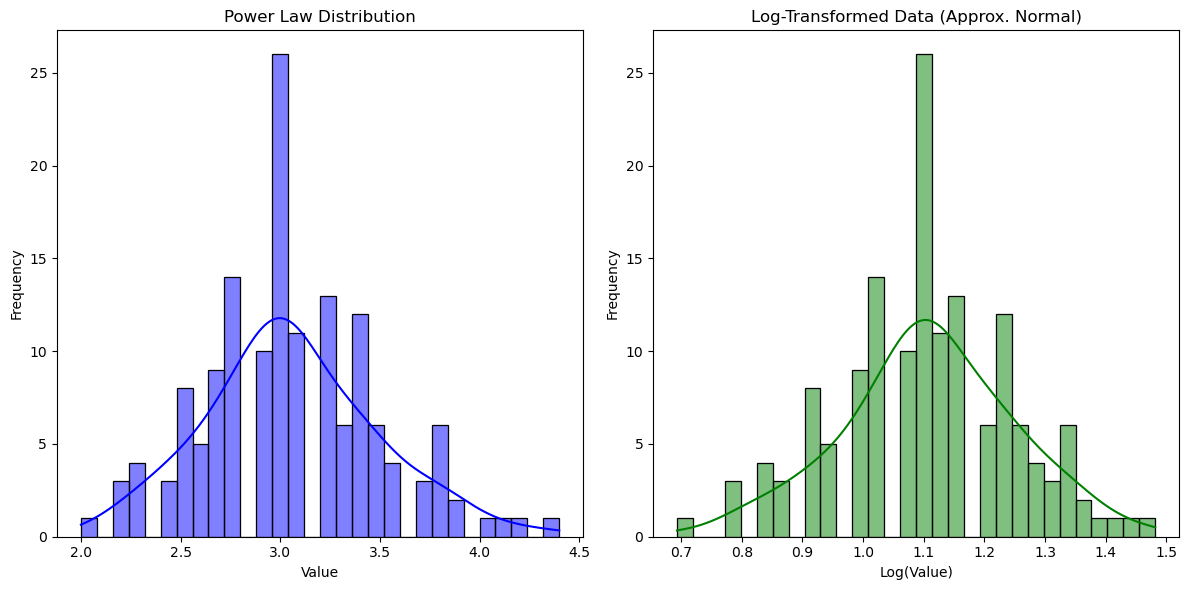

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

## Step 1: Generate Power Law Distribution
alpha = 2.5  # Power law exponent
size = 1000  # Sample size
power_law_data = (iris_df['sepal width (cm)'] )  # +1 to avoid zero values

## Step 2: Transform to approximate normal distribution
log_transformed_data = np.log(iris_df['sepal width (cm)'])

## Step 3: Plot the distributions
plt.figure(figsize=(12, 6))

## Plot original Power Law Distribution
plt.subplot(1, 2, 1)
sns.histplot(power_law_data, bins=30, kde=True, color='blue')
plt.title('Power Law Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

## Plot Log-Transformed Data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, bins=30, kde=True, color='green')
plt.title('Log-Transformed Data (Approx. Normal)')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


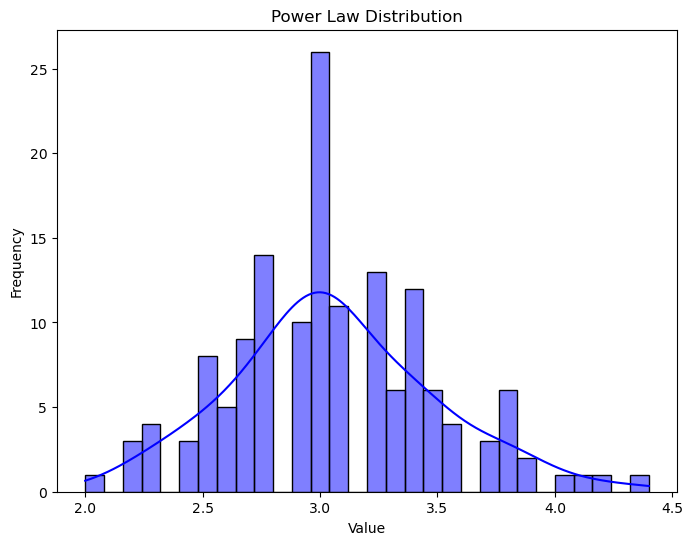

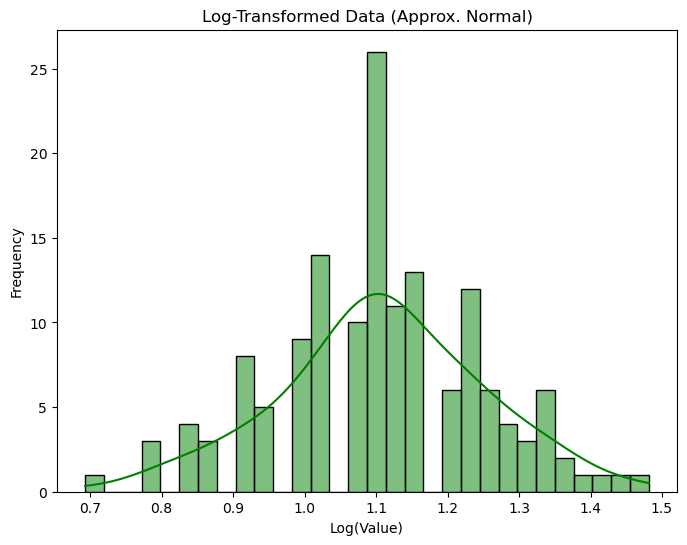

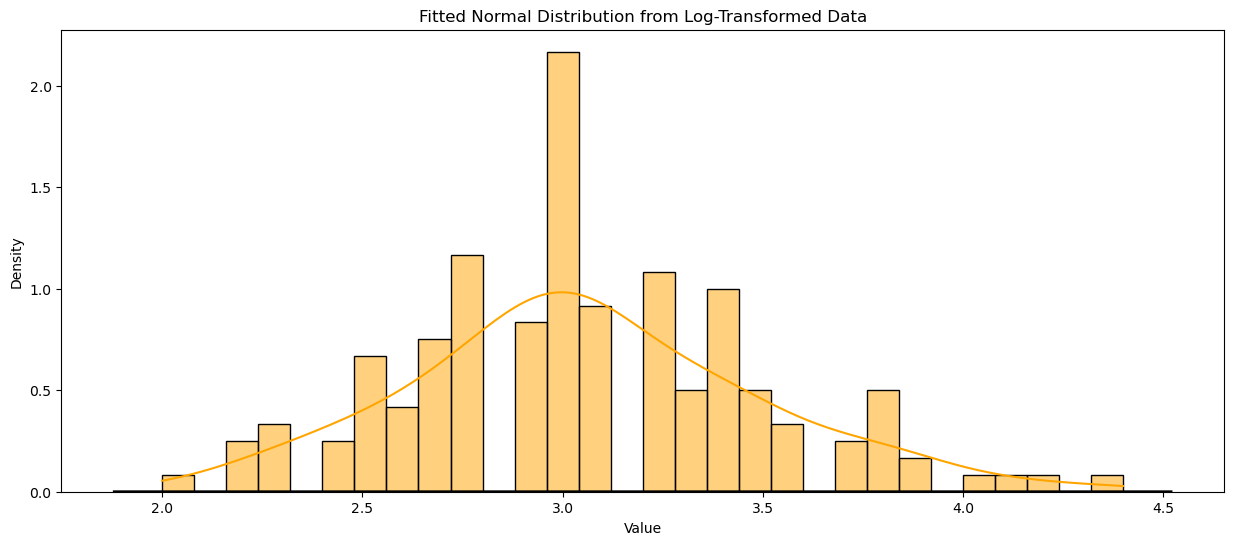

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Step 1: Generate Power Law Distribution
alpha = 2.5  # Power law exponent
size = 1000  # Sample size
## Generate data from a Pareto distribution, shifted by +1 to avoid zero values
power_law_data = iris_df['sepal width (cm)']

## Step 2: Transform to approximate normal distribution
## Apply logarithmic transformation to the power law data
log_transformed_data = np.log(power_law_data)

## Step 3: Fit a normal distribution to the log-transformed data
mu, std = norm.fit(log_transformed_data)  # Fit a normal distribution to the data

## Generate samples from the fitted normal distribution
normal_samples = power_law_data
## Step 4: Visualize each graph one by one

## Plot 1: Original Power Law Distribution
plt.figure(figsize=(8, 6))
sns.histplot(power_law_data, bins=30, kde=True, color='blue')
plt.title('Power Law Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()  # Display the first plot

## Plot 2: Log-Transformed Data
plt.figure(figsize=(8, 6))
sns.histplot(log_transformed_data, bins=30, kde=True, color='green')
plt.title('Log-Transformed Data (Approx. Normal)')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')
plt.show()  # Display the second plot

## Plot 3: Fitted Normal Distribution
plt.figure(figsize=(15, 6))
## Create histogram for the normal samples
sns.histplot(normal_samples, bins=30, kde=True, color='orange', stat='density')
## Overlay the theoretical normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Calculate the PDF for the normal distribution
plt.plot(x, p, 'k', linewidth=2)  # Plot the PDF
plt.title('Fitted Normal Distribution from Log-Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()  # Display the third plot


In [10]:
## Generating the Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto, boxcox, probplot, kstest

# Generate synthetic data with a Power Law distribution using the Pareto distribution
np.random.seed(42)  # For reproducibility
alpha = 2.0  # Shape parameter for the Pareto distribution
size = 1000  # Size of the dataset
data = (np.random.pareto(alpha, size) + 1) * 100  # Scale for more realistic values
df = pd.DataFrame(data, columns=['Value'])


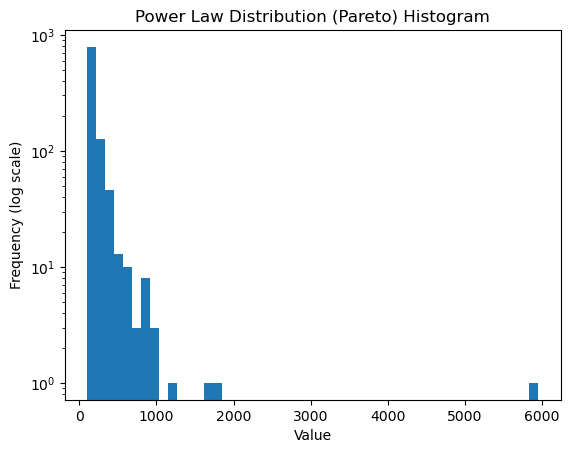

In [11]:
##  How can we visualize the Power Law distributed dataset?
plt.hist(df['Value'], bins=50, log=True)
plt.title("Power Law Distribution (Pareto) Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency (log scale)")
plt.show()



In [12]:
## How can we estimate the alpha parameter for this dataset?

shape, loc, scale = pareto.fit(df['Value'], floc=0)
print("Estimated alpha:", shape)

Estimated alpha: 2.0664078090784246


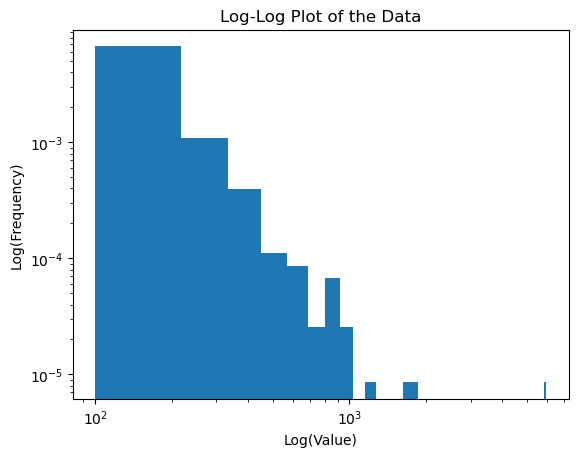

In [13]:
## How can we determine if the dataset follows a Power Law distribution?

plt.hist(df['Value'], bins=50, density=True, log=True)
plt.yscale('log')
plt.xscale('log')
plt.title("Log-Log Plot of the Data")
plt.xlabel("Log(Value)")
plt.ylabel("Log(Frequency)")
plt.show()


In [14]:
## How can we fit a Power Law distribution and estimate alpha?

alpha, loc, scale = pareto.fit(df['Value'], floc=0)
print("Alpha parameter:", alpha)


Alpha parameter: 2.0664078090784246


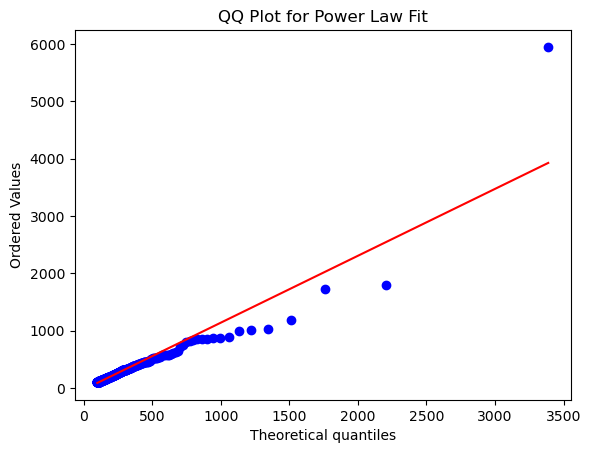

In [15]:
## Visualize QQ plot to check Power Law fit

probplot(df['Value'], dist="pareto", sparams=(alpha, loc, scale), plot=plt)
plt.title("QQ Plot for Power Law Fit")
plt.show()


In [16]:
## Perform Box-Cox transformation on the dataset to normalize it

transformed_data, best_lambda = boxcox(df['Value'])
print("Best lambda for Box-Cox:", best_lambda)


Best lambda for Box-Cox: -1.448396339032588


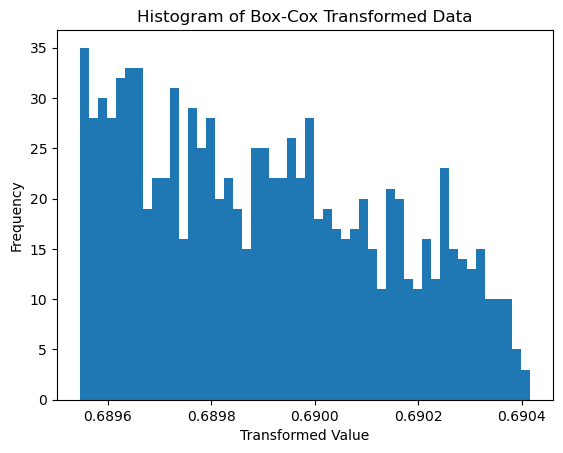

In [17]:
## Visualize transformed data to assess normality

plt.hist(transformed_data, bins=50)
plt.title("Histogram of Box-Cox Transformed Data")
plt.xlabel("Transformed Value")
plt.ylabel("Frequency")
plt.show()


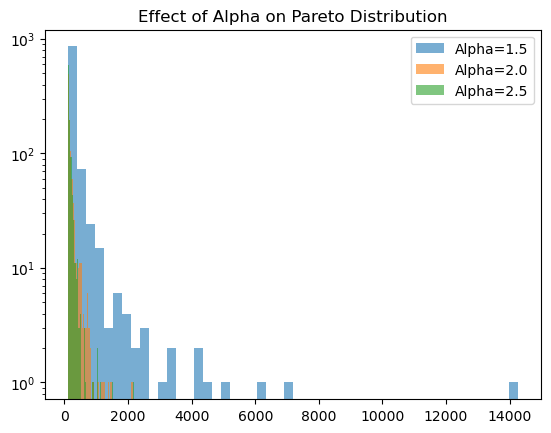

In [18]:
## Observe effect of alpha on distribution shape

for a in [1.5, 2.0, 2.5]:
    synthetic_data = (np.random.pareto(a, size) + 1) * 100
    plt.hist(synthetic_data, bins=50, alpha=0.6, label=f'Alpha={a}')
plt.yscale('log')
plt.legend()
plt.title("Effect of Alpha on Pareto Distribution")
plt.show()


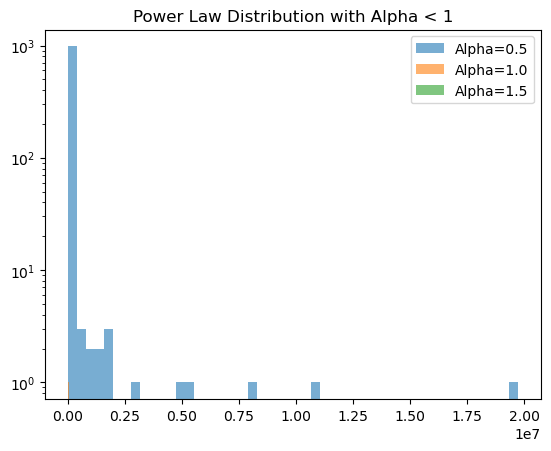

In [19]:
## How does Power Law behave with alpha between 0 and 1?

for a in [0.5, 1.0, 1.5]:
    synthetic_data = (np.random.pareto(a, size) + 1) * 100
    plt.hist(synthetic_data, bins=50, alpha=0.6, label=f'Alpha={a}')
plt.yscale('log')
plt.legend()
plt.title("Power Law Distribution with Alpha < 1")
plt.show()


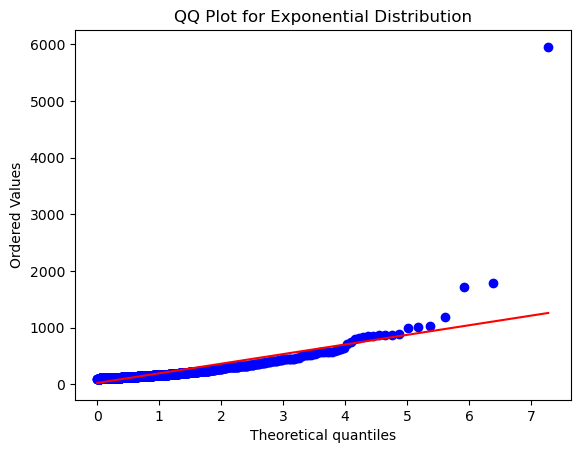

In [20]:
## Differentiate between Power Law and Exponential distributions using QQ plots

probplot(df['Value'], dist="expon", plot=plt)
plt.title("QQ Plot for Exponential Distribution")
plt.show()


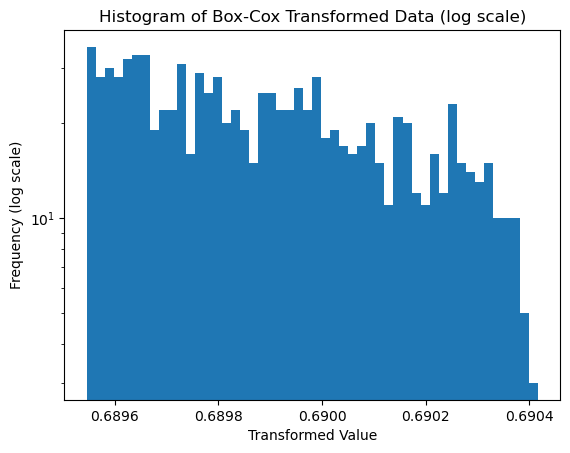

In [21]:
## Analyze if the Box-Cox transformation reduces outliers

plt.hist(transformed_data, bins=50, log=True)
plt.title("Histogram of Box-Cox Transformed Data (log scale)")
plt.xlabel("Transformed Value")
plt.ylabel("Frequency (log scale)")
plt.show()
